In [1]:
from pymc import DiscreteUniform,Exponential,deterministic,Poisson,Uniform
import numpy as np

In [2]:
disasters_array = np.array([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                   3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                   2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                   1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                   0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                   3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [3]:
disasters_array

array([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6, 3, 3, 5, 4, 5, 3, 1,
       4, 4, 1, 5, 5, 3, 4, 2, 5, 2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3,
       0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2,
       0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [4]:
swithcpoint = DiscreteUniform('swithpoint',lower=0,upper=110,doc='Switchpoint[year]')

In [5]:
swithcpoint

<pymc.distributions.DiscreteUniform 'swithpoint' at 0x7fb83ca870d0>

In [6]:
early_mean = Exponential('early_mean',beta=1.)
late_mean = Exponential('late_mean',beta=1.)

In [7]:
@deterministic(plot=False)
def rate(s=swithcpoint,e=early_mean,l=late_mean):
    out = np.empty(len(disasters_array))
    out[:s] = e
    out[s:] = l
    return out

In [8]:
disasters = Poisson('disasters',mu=rate,value=disasters_array,observed=True)

In [9]:
from pymc.examples import disaster_model

In [10]:
disaster_model.switchpoint.parents

{'lower': 0, 'upper': 110}

In [11]:
disaster_model.disasters.parents

{'mu': <pymc.PyMCObjects.Deterministic 'rate' at 0x7fb83ca58cd0>}

In [12]:
disaster_model.rate.children

{<pymc.distributions.Poisson 'disasters' at 0x7fb83ca58bd0>}

In [13]:
disaster_model.disasters.value

array([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6, 3, 3, 5, 4, 5, 3, 1,
       4, 4, 1, 5, 5, 3, 4, 2, 5, 2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3,
       0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2,
       0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [14]:
disaster_model.switchpoint.value

array(45)

In [15]:
disaster_model.early_mean.value

array(1.3072489997026144)

In [16]:
disaster_model.late_mean.value

array(3.1170228002139315)

In [17]:
disaster_model.rate.value

array([ 1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,
        1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,
        1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,
        1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,
        1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,
        1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,
        1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,
        1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,
        1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,  1.307249 ,
        3.1170228,  3.1170228,  3.1170228,  3.1170228,  3.1170228,
        3.1170228,  3.1170228,  3.1170228,  3.1170228,  3.1170228,
        3.1170228,  3.1170228,  3.1170228,  3.1170228,  3.1170228,
        3.1170228,  3.1170228,  3.1170228,  3.1170228,  3.1170228,
        3.1170228,  3.1170228,  3.1170228,  3.1170228,  3.1170228,
        3.1170228,  3.1170228,  3.1170228,  3.1170228,  3.1170

In [18]:
disaster_model.switchpoint.logp

-4.709530201312334

In [19]:
from pymc import MCMC

In [20]:
M = MCMC(disaster_model)

In [21]:
M.sample(iter=10000,burn=0,thin=1)

 [-----------------100%-----------------] 10000 of 10000 complete in 2.1 sec

In [22]:
M.trace('switchpoint')[:]

array([102, 102, 102, ...,  41,  41,  41])

In [23]:
M.trace('late_mean')[:]

array([ 3.1170228 ,  3.1170228 ,  3.1170228 , ...,  0.66872643,
        0.66872643,  0.96449716])

(array([  3.60000000e+01,   5.30000000e+02,   7.67000000e+03,
          1.75800000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          4.00000000e+00]),
 array([ 0.16168802,  0.4572215 ,  0.75275498,  1.04828846,  1.34382193,
         1.63935541,  1.93488889,  2.23042237,  2.52595584,  2.82148932,
         3.1170228 ]),
 <a list of 10 Patch objects>)

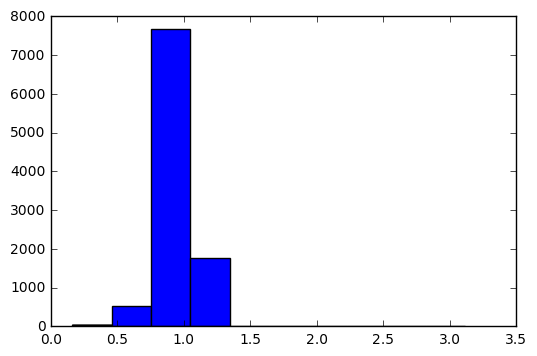

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(M.trace('late_mean')[:])

Plotting switchpoint
Plotting early_mean
Plotting late_mean


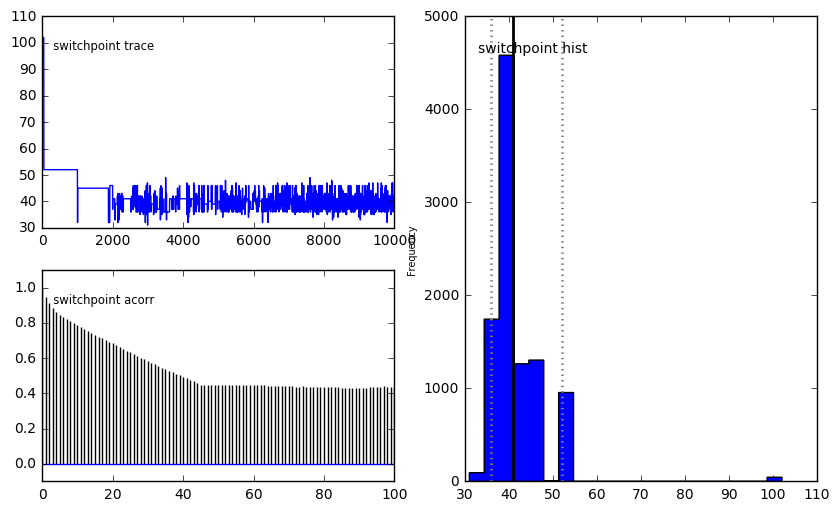

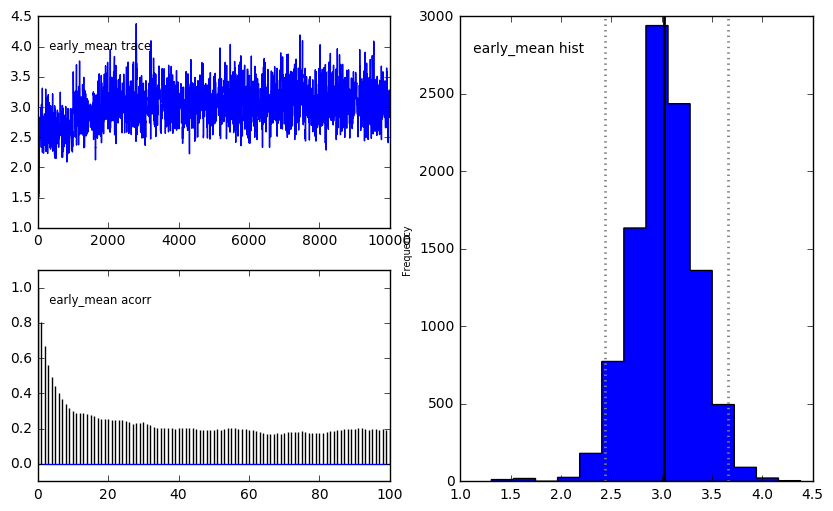

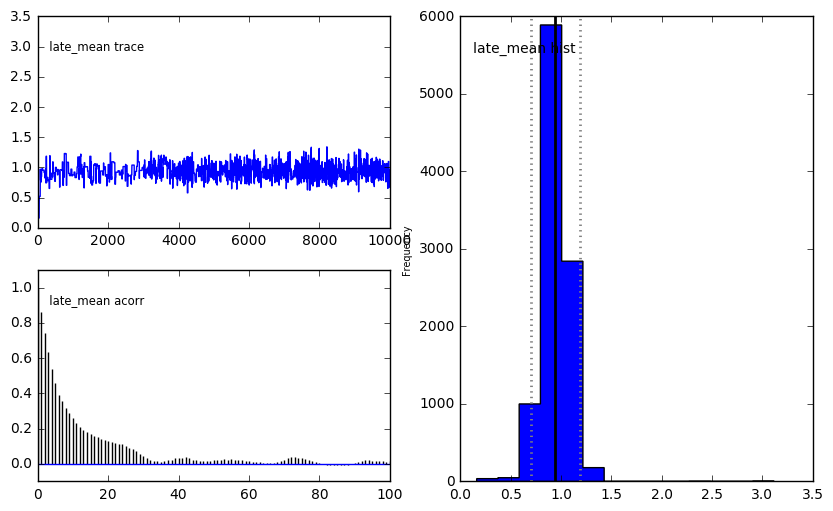

In [25]:
from pymc.Matplot import plot
plot(M)

In [28]:
import pymc
import pydot
pymc.graph.moral_graph(M)

In [27]:
import pydot